In [1]:
# Input info
input_col = "Input"
use_input = True


# use_input = False
# min_cell = 10

outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/cluster_clone_counts/sepDonors_oneCond/"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
min_cell = 10

In [2]:
if use_input: 
    cond = "input"
else:
    cond = "cultured"

In [3]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import colorcet as cc
%matplotlib inline
import numpy as np

In [5]:
sns.set_context("paper", font_scale=2.5)

In [6]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)

palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))
hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
color_d = {key:val for key, val in zip(hue_order, palette)}

se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Flt3l_AAACGAAAGGAGACTC-1,Flt3l,531,531,2286,298,7,7,124,749,1101,...,1,649,621,NaN,Flt3l_AAACGAAAGGAGACTC-1,None,None,None,None,Neutrophil
Flt3l_AAACGAAAGTCACGCC-1,Flt3l,1222,1222,4711,555,16,12,289,853,2986,...,3,1674,1502,NaN,Flt3l_AAACGAAAGTCACGCC-1,None,None,None,None,Erythrocyte
Flt3l_AAACGAACAAGACTAA-1,Flt3l,2225,2225,9178,1509,37,19,585,1339,5689,...,1,3369,2695,NaN,Flt3l_AAACGAACAAGACTAA-1,None,None,None,None,Neutrophil
Flt3l_AAACGAACAAGCGAAC-1,Flt3l,2271,2271,8825,1544,24,24,535,1308,5390,...,5,3360,2784,NaN,Flt3l_AAACGAACAAGCGAAC-1,None,None,None,None,Granulocyte
Flt3l_AAACGAACACAGCCAC-1,Flt3l,2854,2854,10589,1294,41,31,456,2764,6003,...,9,3722,2998,NaN,Flt3l_AAACGAACACAGCCAC-1,None,None,None,None,Non-classical monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3580,3580,17067,3257,63,80,461,8097,5109,...,0,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,1,0,Input,0_1,HSPC 1
Input_TTTGTGTTCCTGAAAC-1,Input,4328,4328,30427,8323,84,99,799,12146,8976,...,7,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,27,0,Input,0_27,MkP
Input_TTTGTGTTCGGGAAAC-1,Input,8010,8010,40114,14032,169,160,1561,10102,14090,...,0,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,19,0,Input,0_19,HSPC 1
Input_TTTGTGTTCGGGACAA-1,Input,3286,3286,22721,4421,43,84,546,11692,5935,...,3,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,2,1,Input,1_2,Erythrocyte


### Remove None before normalizing

In [7]:
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
else:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] != input_col]

    
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Input_AAACGAAAGATATGAC-1,Input,2855,2855,29954,4853,67,103,626,19521,4784,...,2,3172,2505,AAACGAAAGATATGAC-1_Input,Input_AAACGAAAGATATGAC-1,11,1,Input,1_11,HSPC 2
Input_AAACGAAAGTAATGTG-1,Input,6507,6507,32111,9018,96,122,1319,11232,10324,...,2,7161,4861,AAACGAAAGTAATGTG-1_Input,Input_AAACGAAAGTAATGTG-1,10,1,Input,1_10,HSPC 2
Input_AAACGAAAGTAGTCGG-1,Input,7528,7528,37923,12542,147,162,1705,10189,13178,...,0,8960,5447,AAACGAAAGTAGTCGG-1_Input,Input_AAACGAAAGTAGTCGG-1,8,1,Input,1_8,HSPC 1
Input_AAACGAACACATTGCA-1,Input,6893,6893,46206,12553,148,184,1239,16880,15202,...,10,10041,5539,AAACGAACACATTGCA-1_Input,Input_AAACGAACACATTGCA-1,0,1,Input,1_0,pre-B cells
Input_AAACGAACACGCTCAG-1,Input,5863,5863,38973,7584,162,150,973,19691,10413,...,7,7103,4786,AAACGAACACGCTCAG-1_Input,Input_AAACGAACACGCTCAG-1,2,0,Input,0_2,MkP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3580,3580,17067,3257,63,80,461,8097,5109,...,0,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,1,0,Input,0_1,HSPC 1
Input_TTTGTGTTCCTGAAAC-1,Input,4328,4328,30427,8323,84,99,799,12146,8976,...,7,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,27,0,Input,0_27,MkP
Input_TTTGTGTTCGGGAAAC-1,Input,8010,8010,40114,14032,169,160,1561,10102,14090,...,0,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,19,0,Input,0_19,HSPC 1
Input_TTTGTGTTCGGGACAA-1,Input,3286,3286,22721,4421,43,84,546,11692,5935,...,3,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,2,1,Input,1_2,Erythrocyte


## boxenplot and violin of clone sizes across cluster

In [8]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)

clone_counts

,name,nuclear_clusters,donor,ncells
0,0_0,Classical Monocyte,0,4
1,0_0,Erythrocyte,0,7
2,0_0,Granulocyte,0,7
3,0_0,HSPC 1,0,163
4,0_0,HSPC 2,0,108
...,...,...,...,...
549,1_9,MkP,1,11
550,1_9,Neutrophil,1,3
551,1_9,Non-classical monocyte,1,1
552,1_9,pDC,1,1


In [9]:
for don, val in clone_counts.groupby("donor"):
    val.pivot(index="name", columns="nuclear_clusters", values="ncells").fillna(0).to_csv(join(outdir, f"donor{don}.{cond}.clone_clust.csv"))

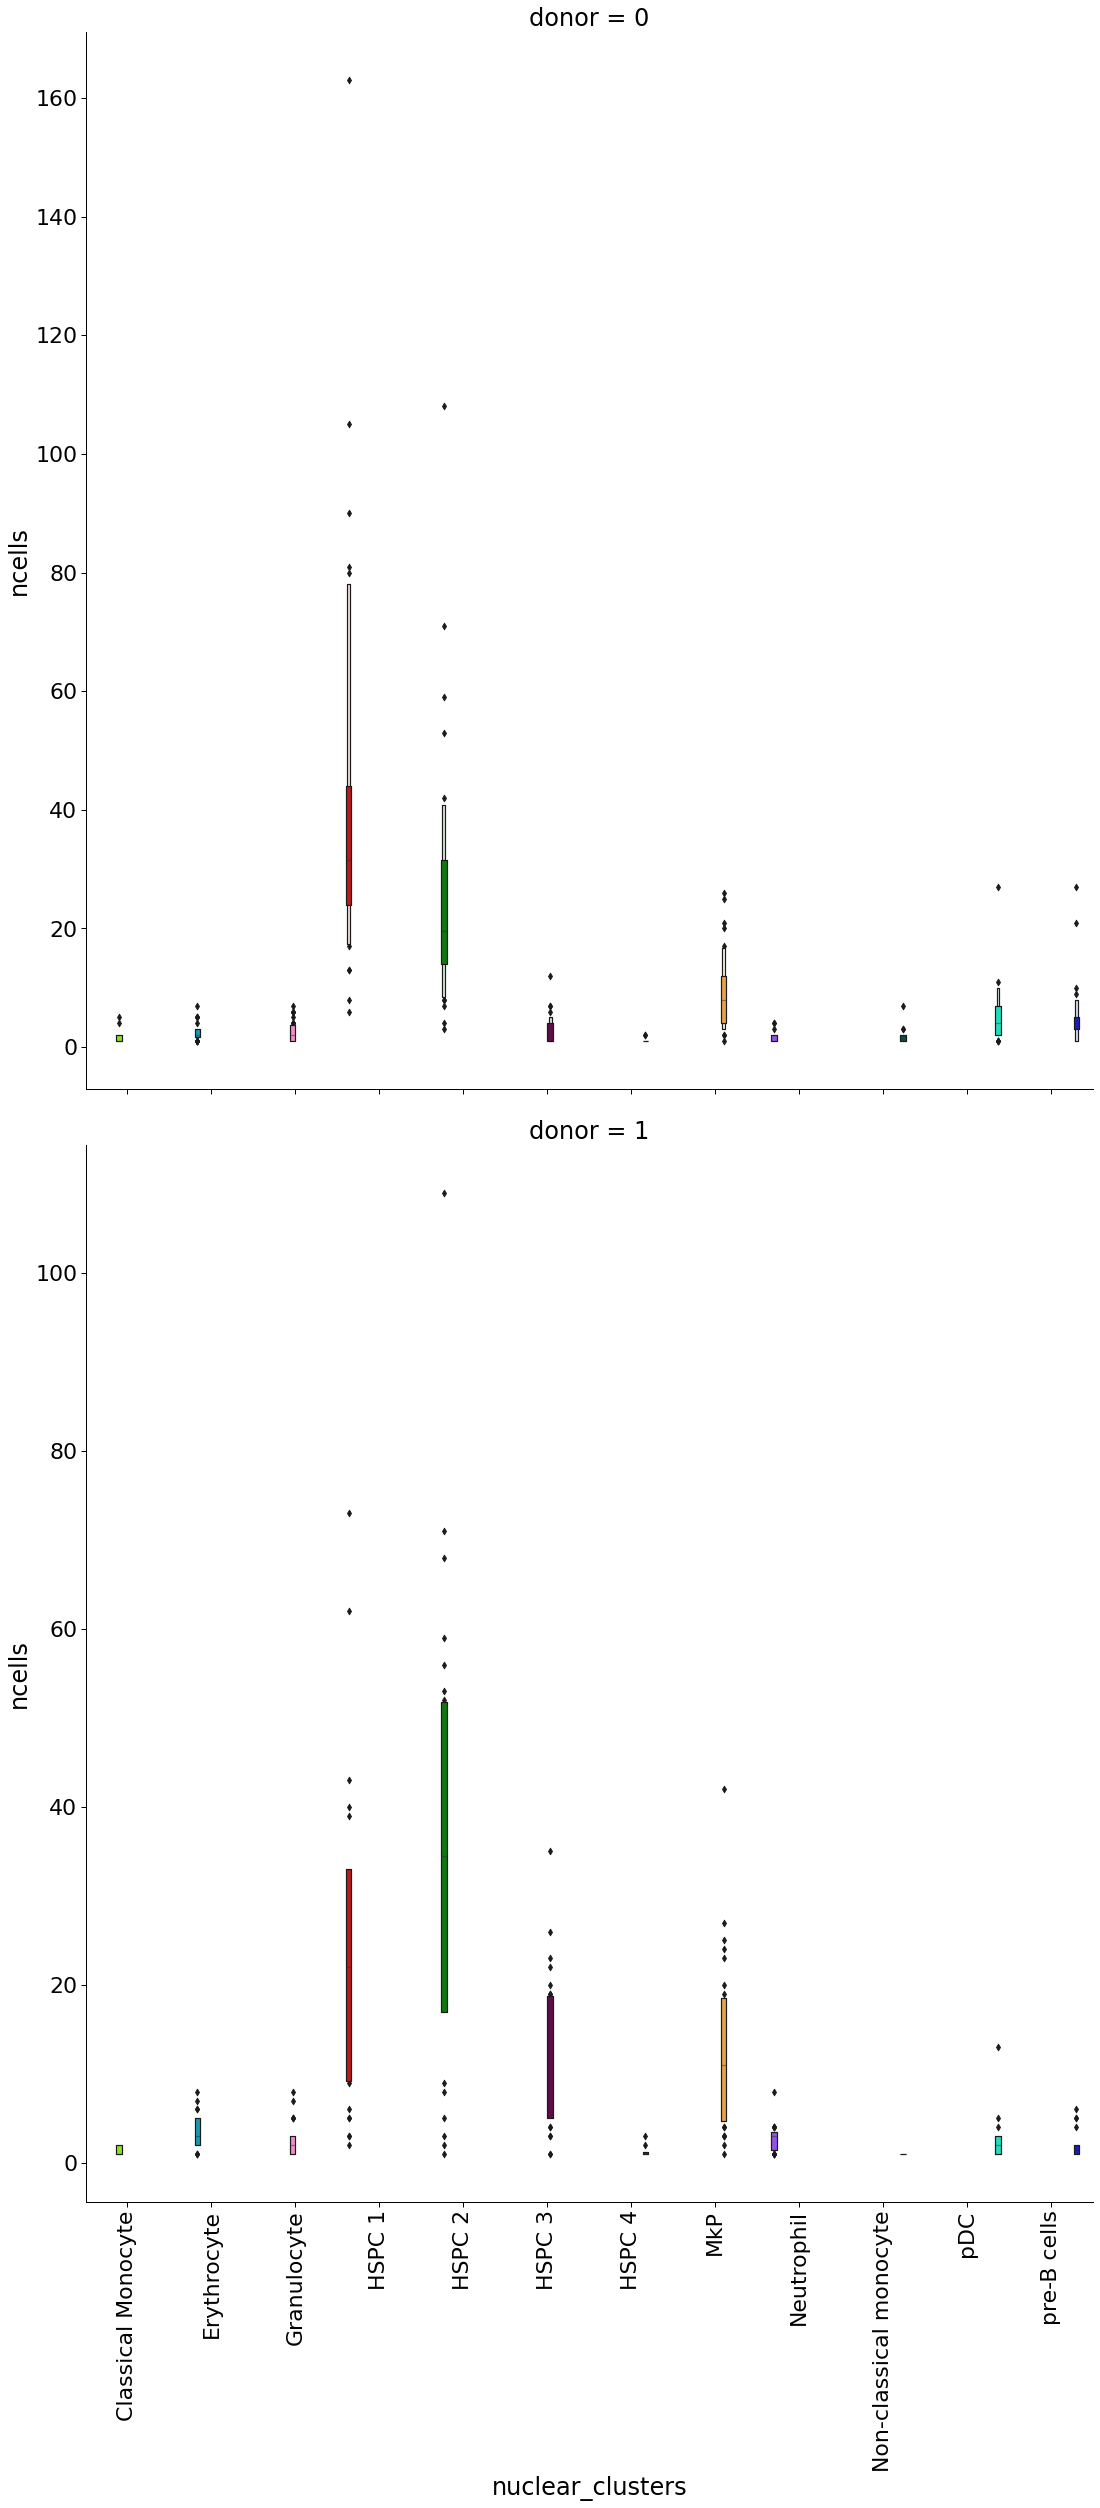

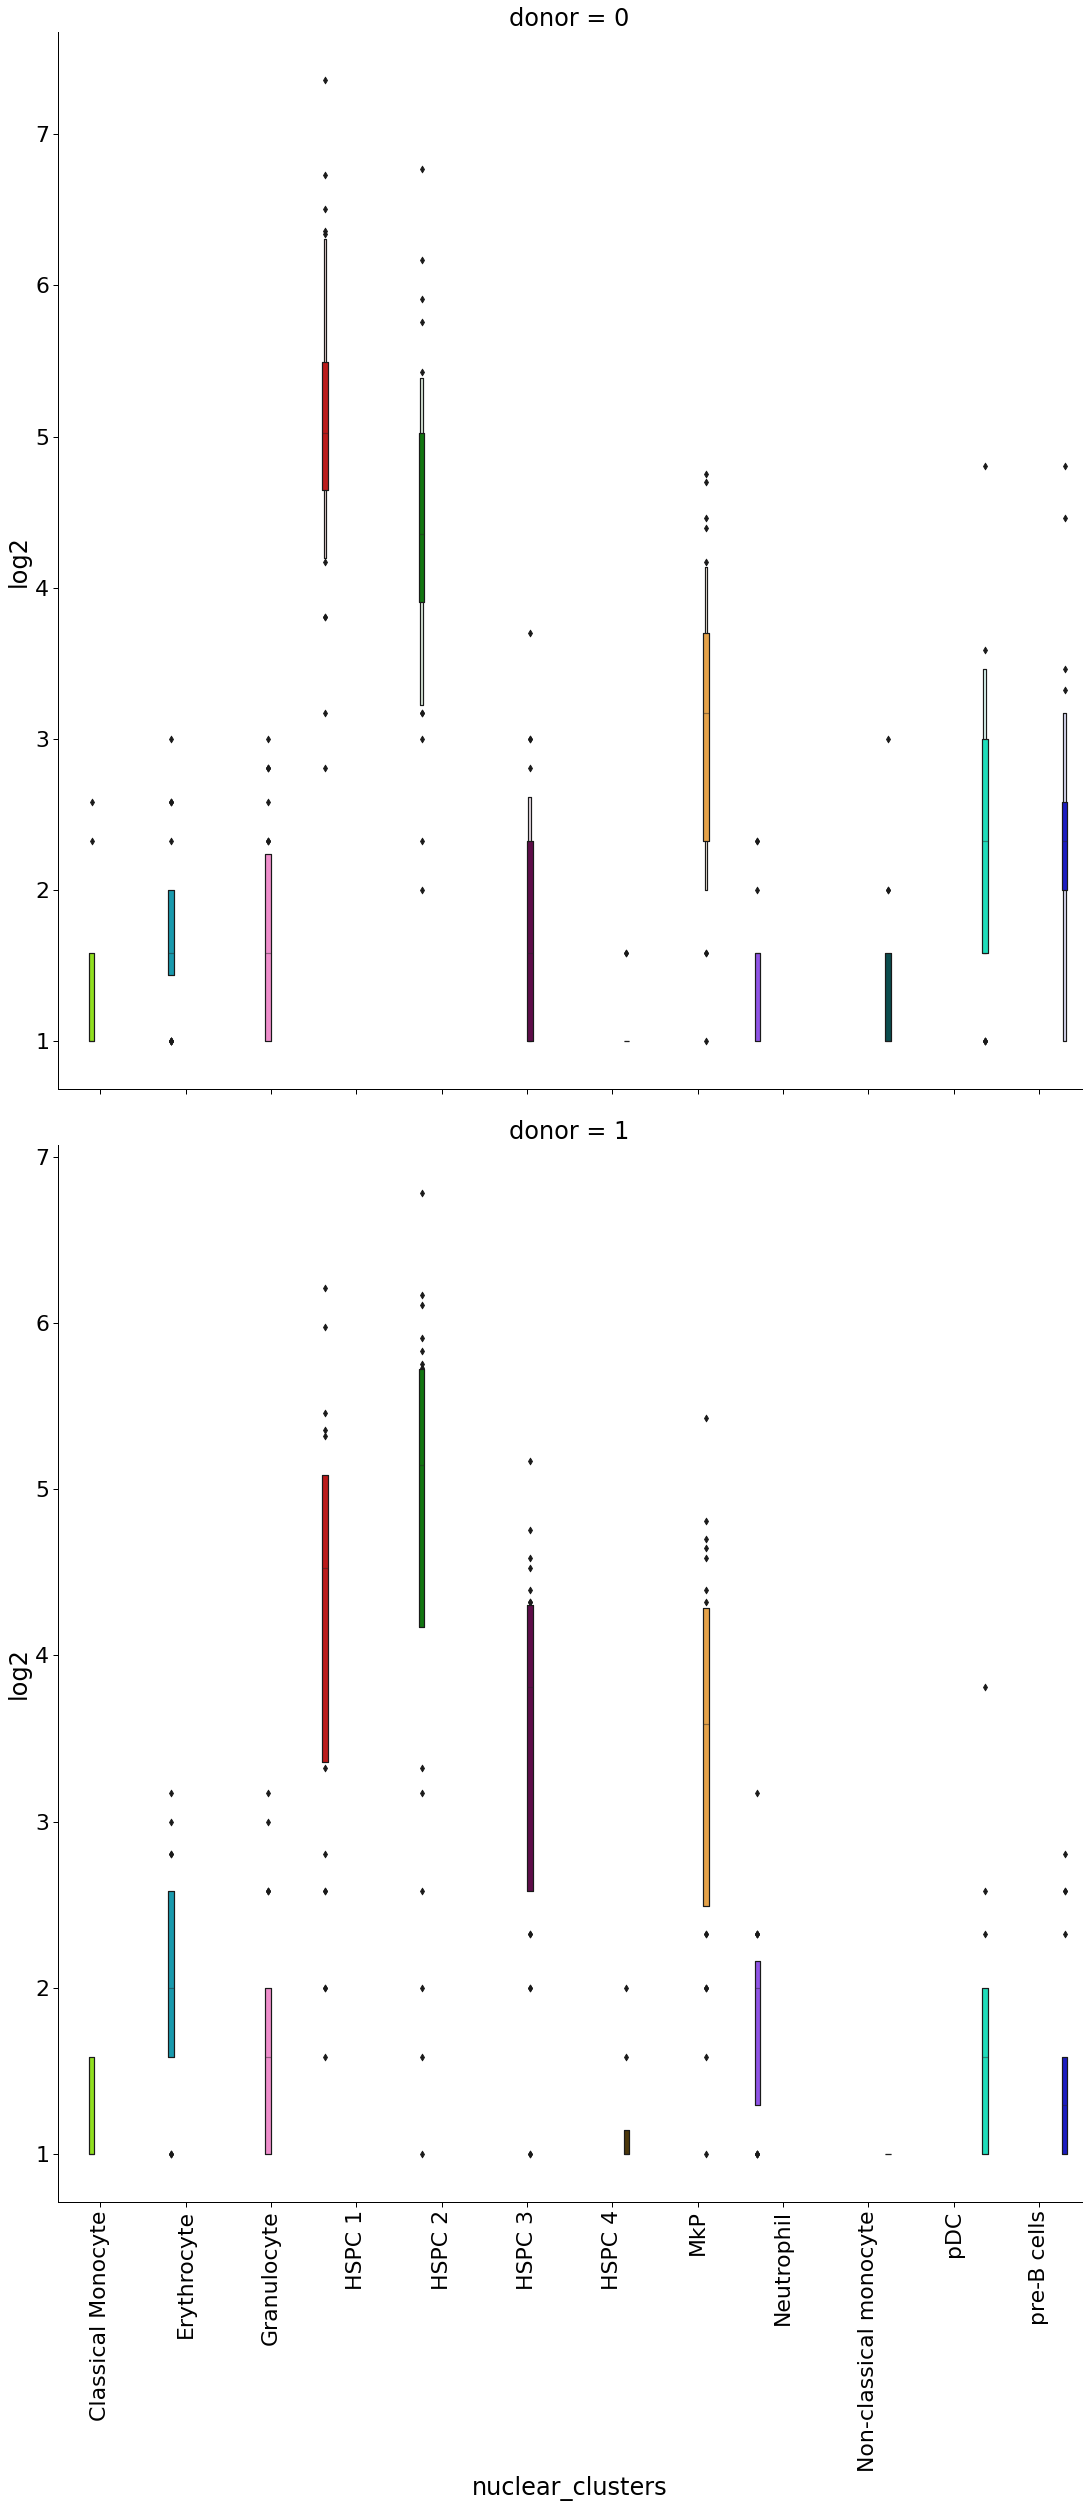

In [10]:

sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, sharey=False,
            row="donor", kind="boxen", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order)
# sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, sharey=False,
#             row="donor", kind="boxen", height=16, hue="nuclear_clusters", outlier_prop=0.001, showfliers=False,
#             palette=palette, hue_order=hue_order, dodge=True)
plt.xticks(rotation=90)
plt.savefig(join(outdir, f"{cond}.clone_cluster_boxen_diffY.svg"))
plt.savefig(join(outdir, f"{cond}.clone_cluster_boxen_diffY.pdf"))


clone_counts["log2"] = np.log2(1+clone_counts["ncells"]).fillna(0)
sns.catplot(x="nuclear_clusters", y="log2", data=clone_counts, sharey=False,
            row="donor", kind="boxen", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order)

plt.xticks(rotation=90)
plt.savefig(join(outdir, f"{cond}.log2_clone_cluster_boxen_diffY.svg"))
plt.savefig(join(outdir, f"{cond}.log2_clone_cluster_boxen_diffY.pdf"))




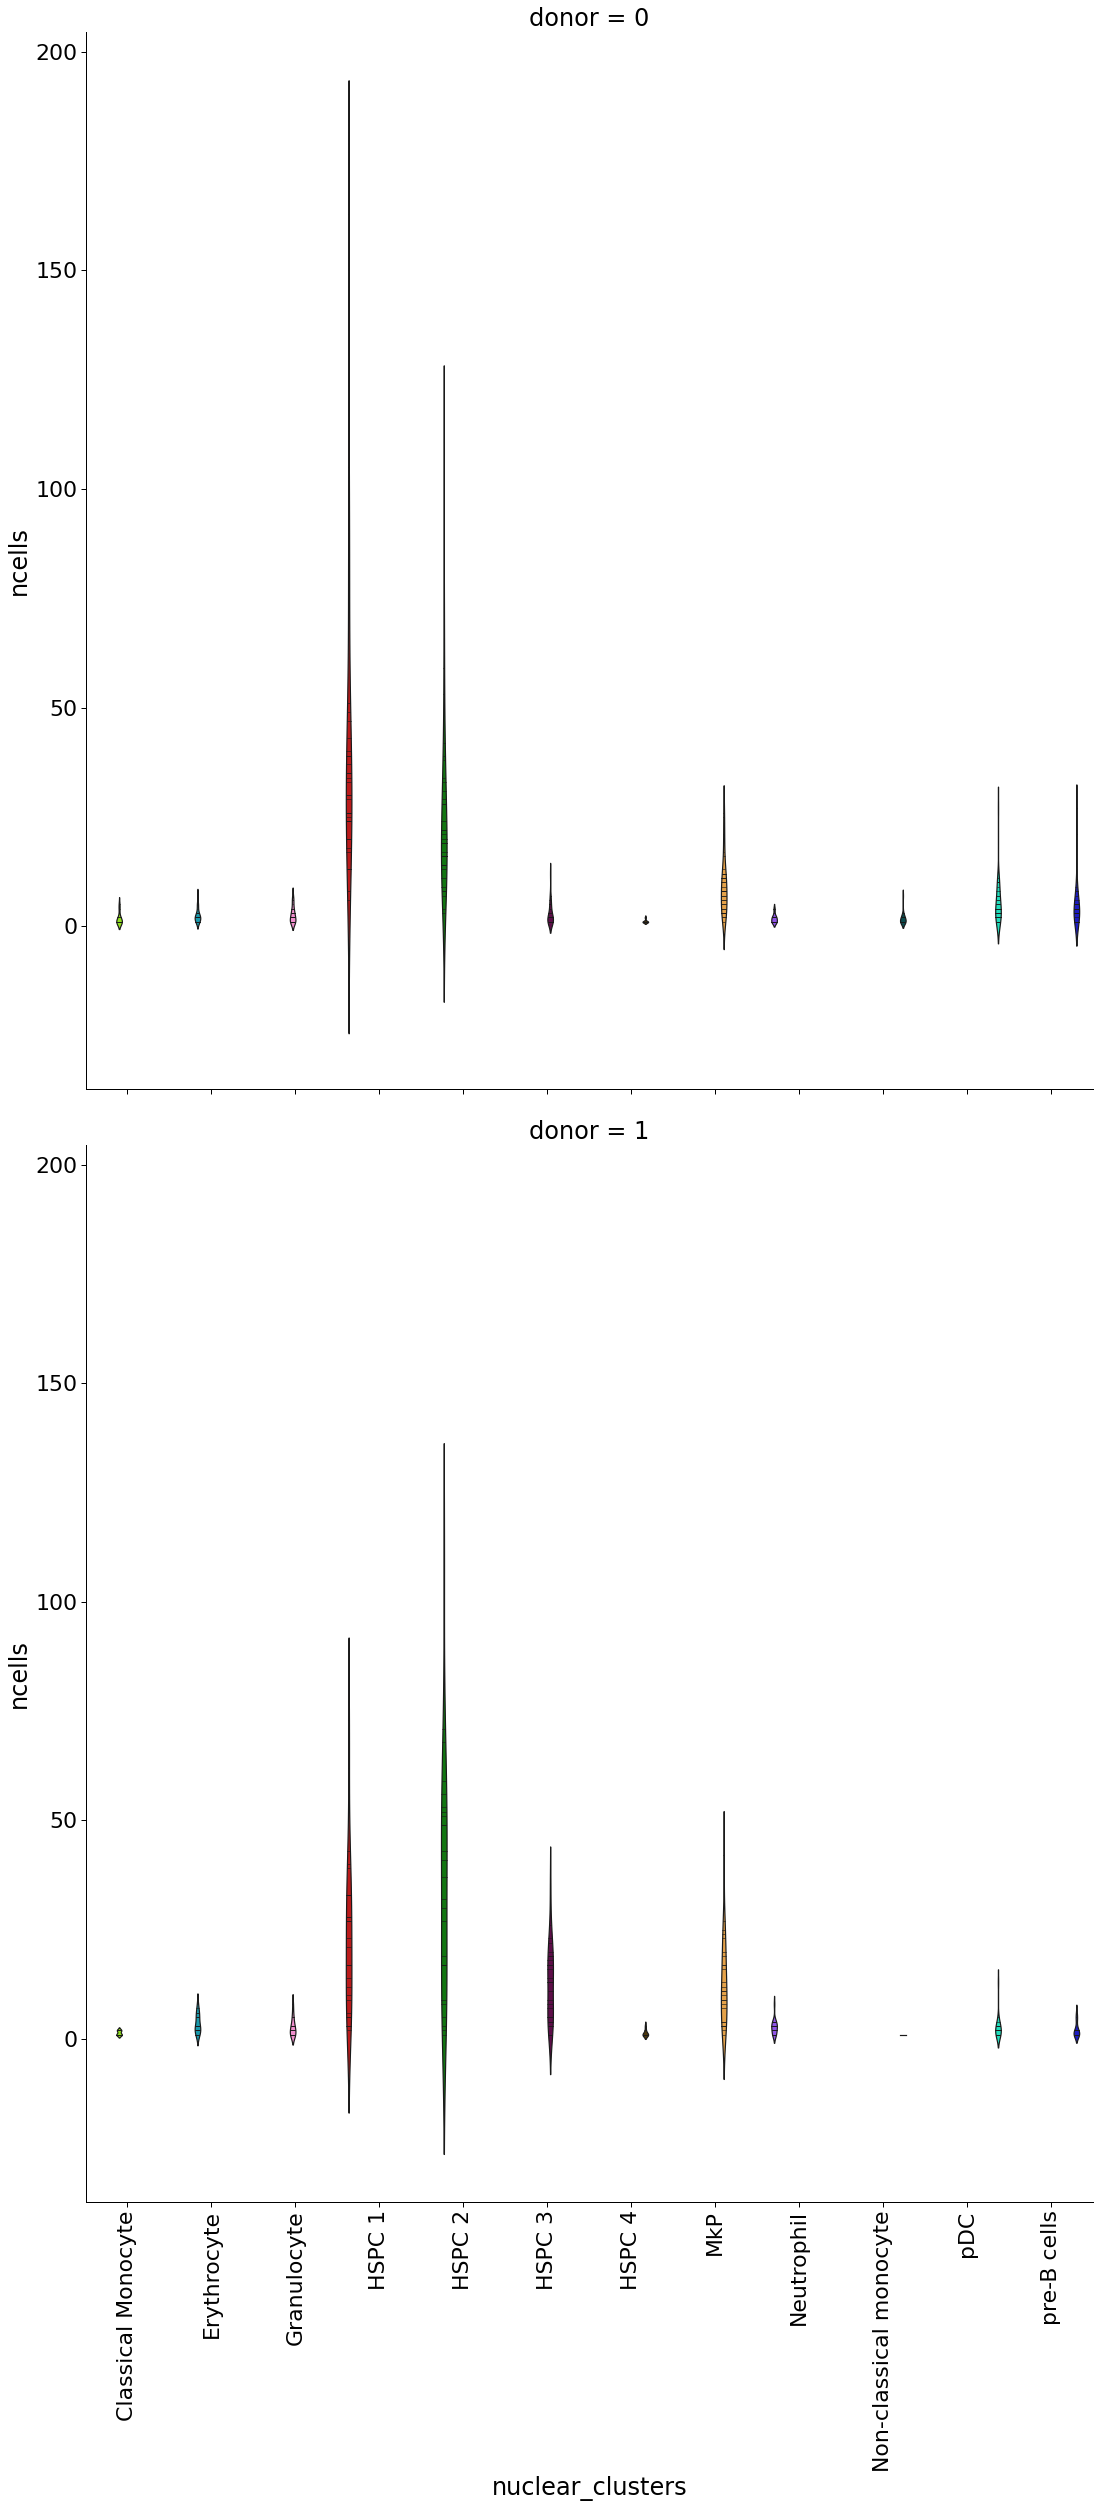

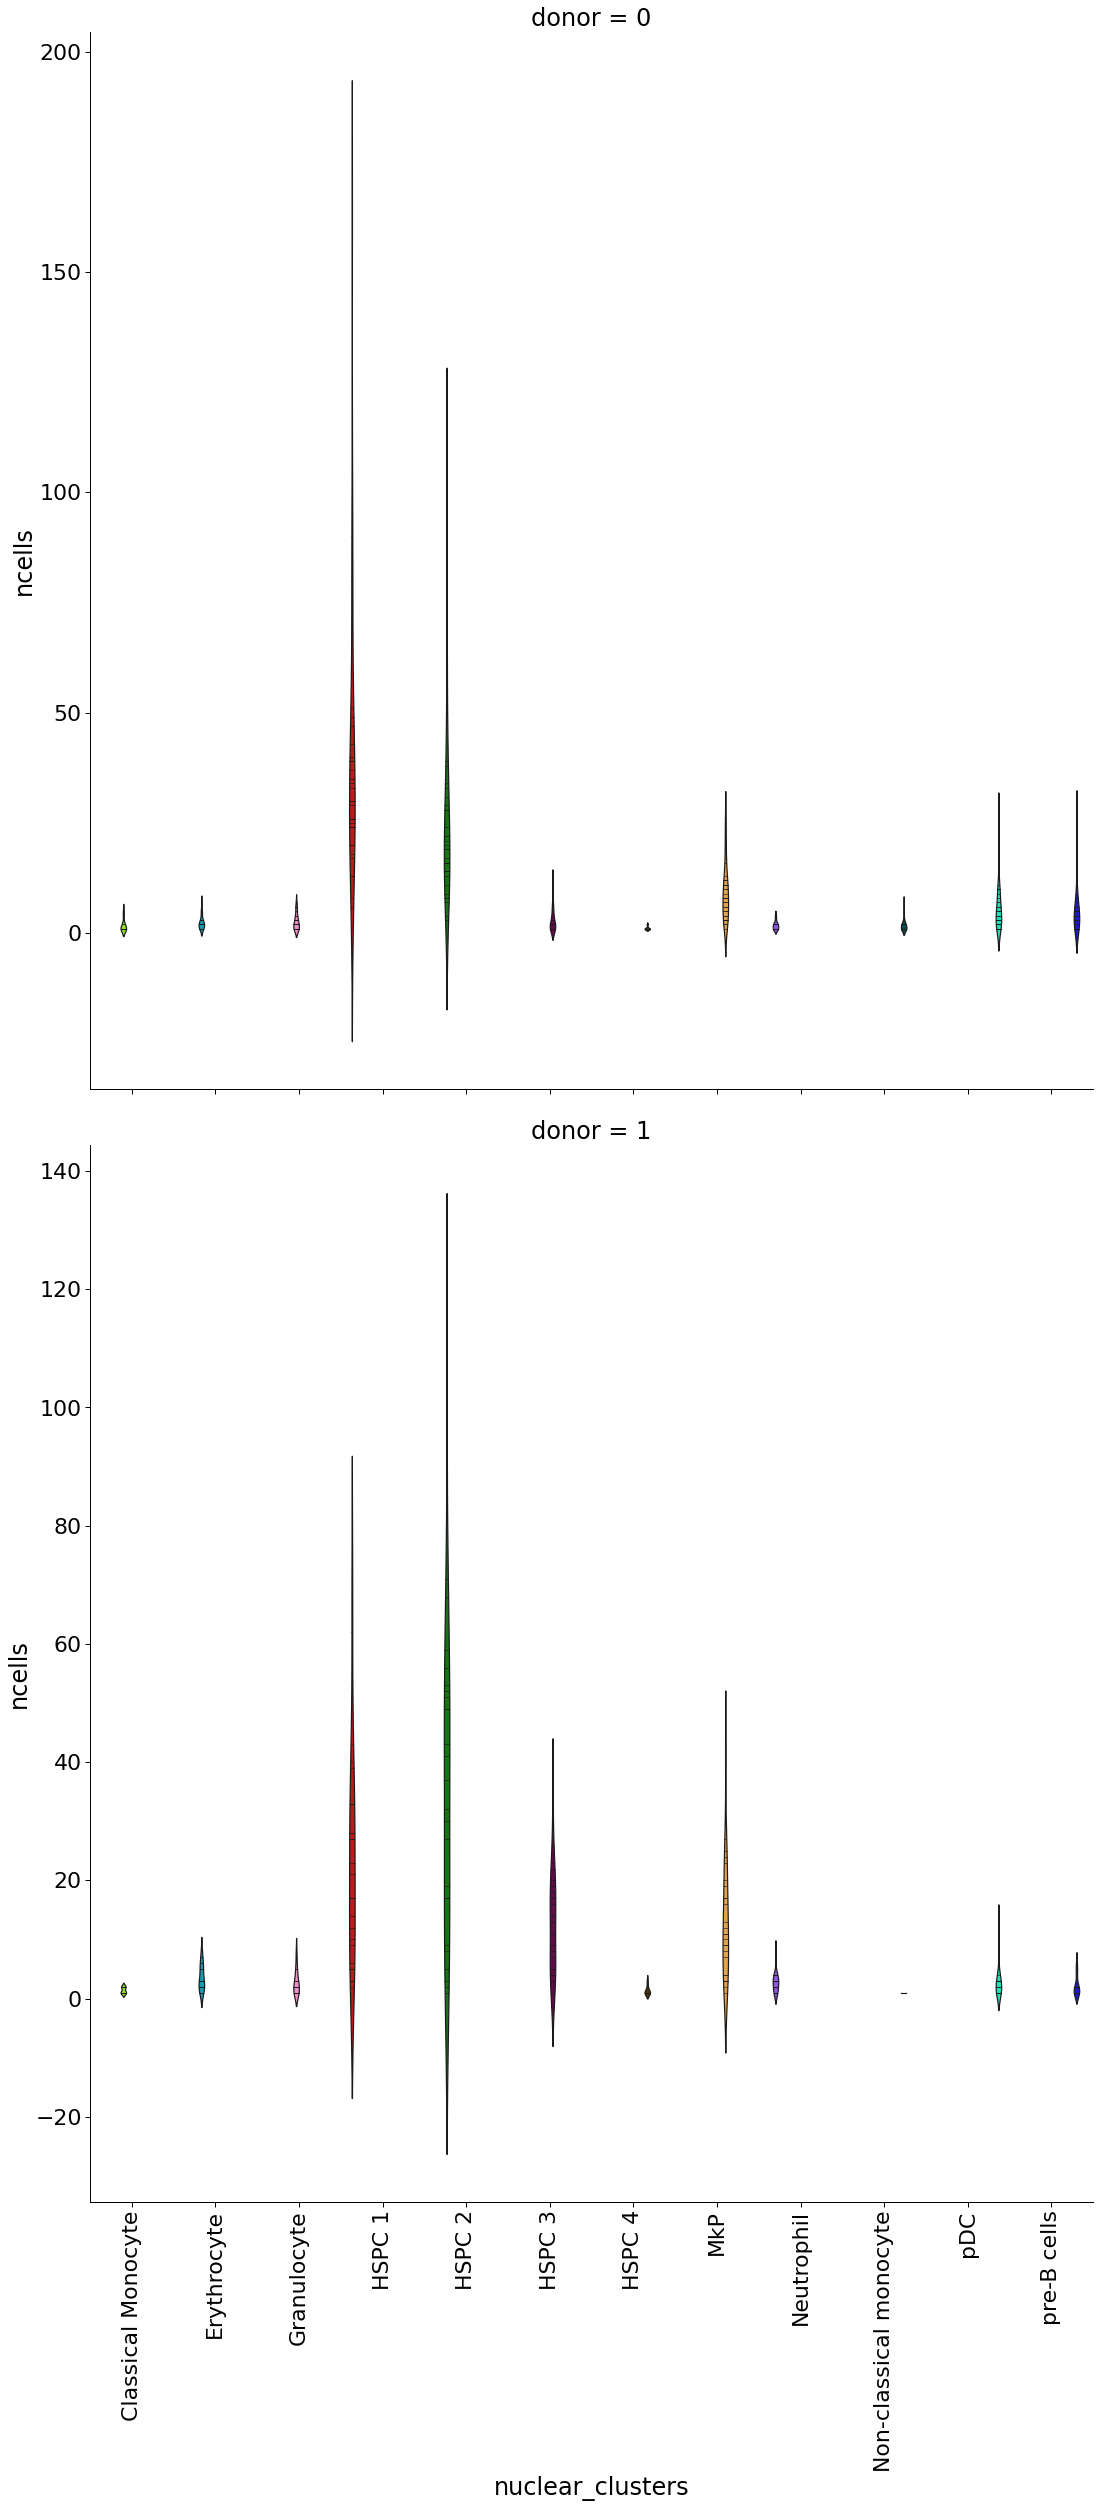

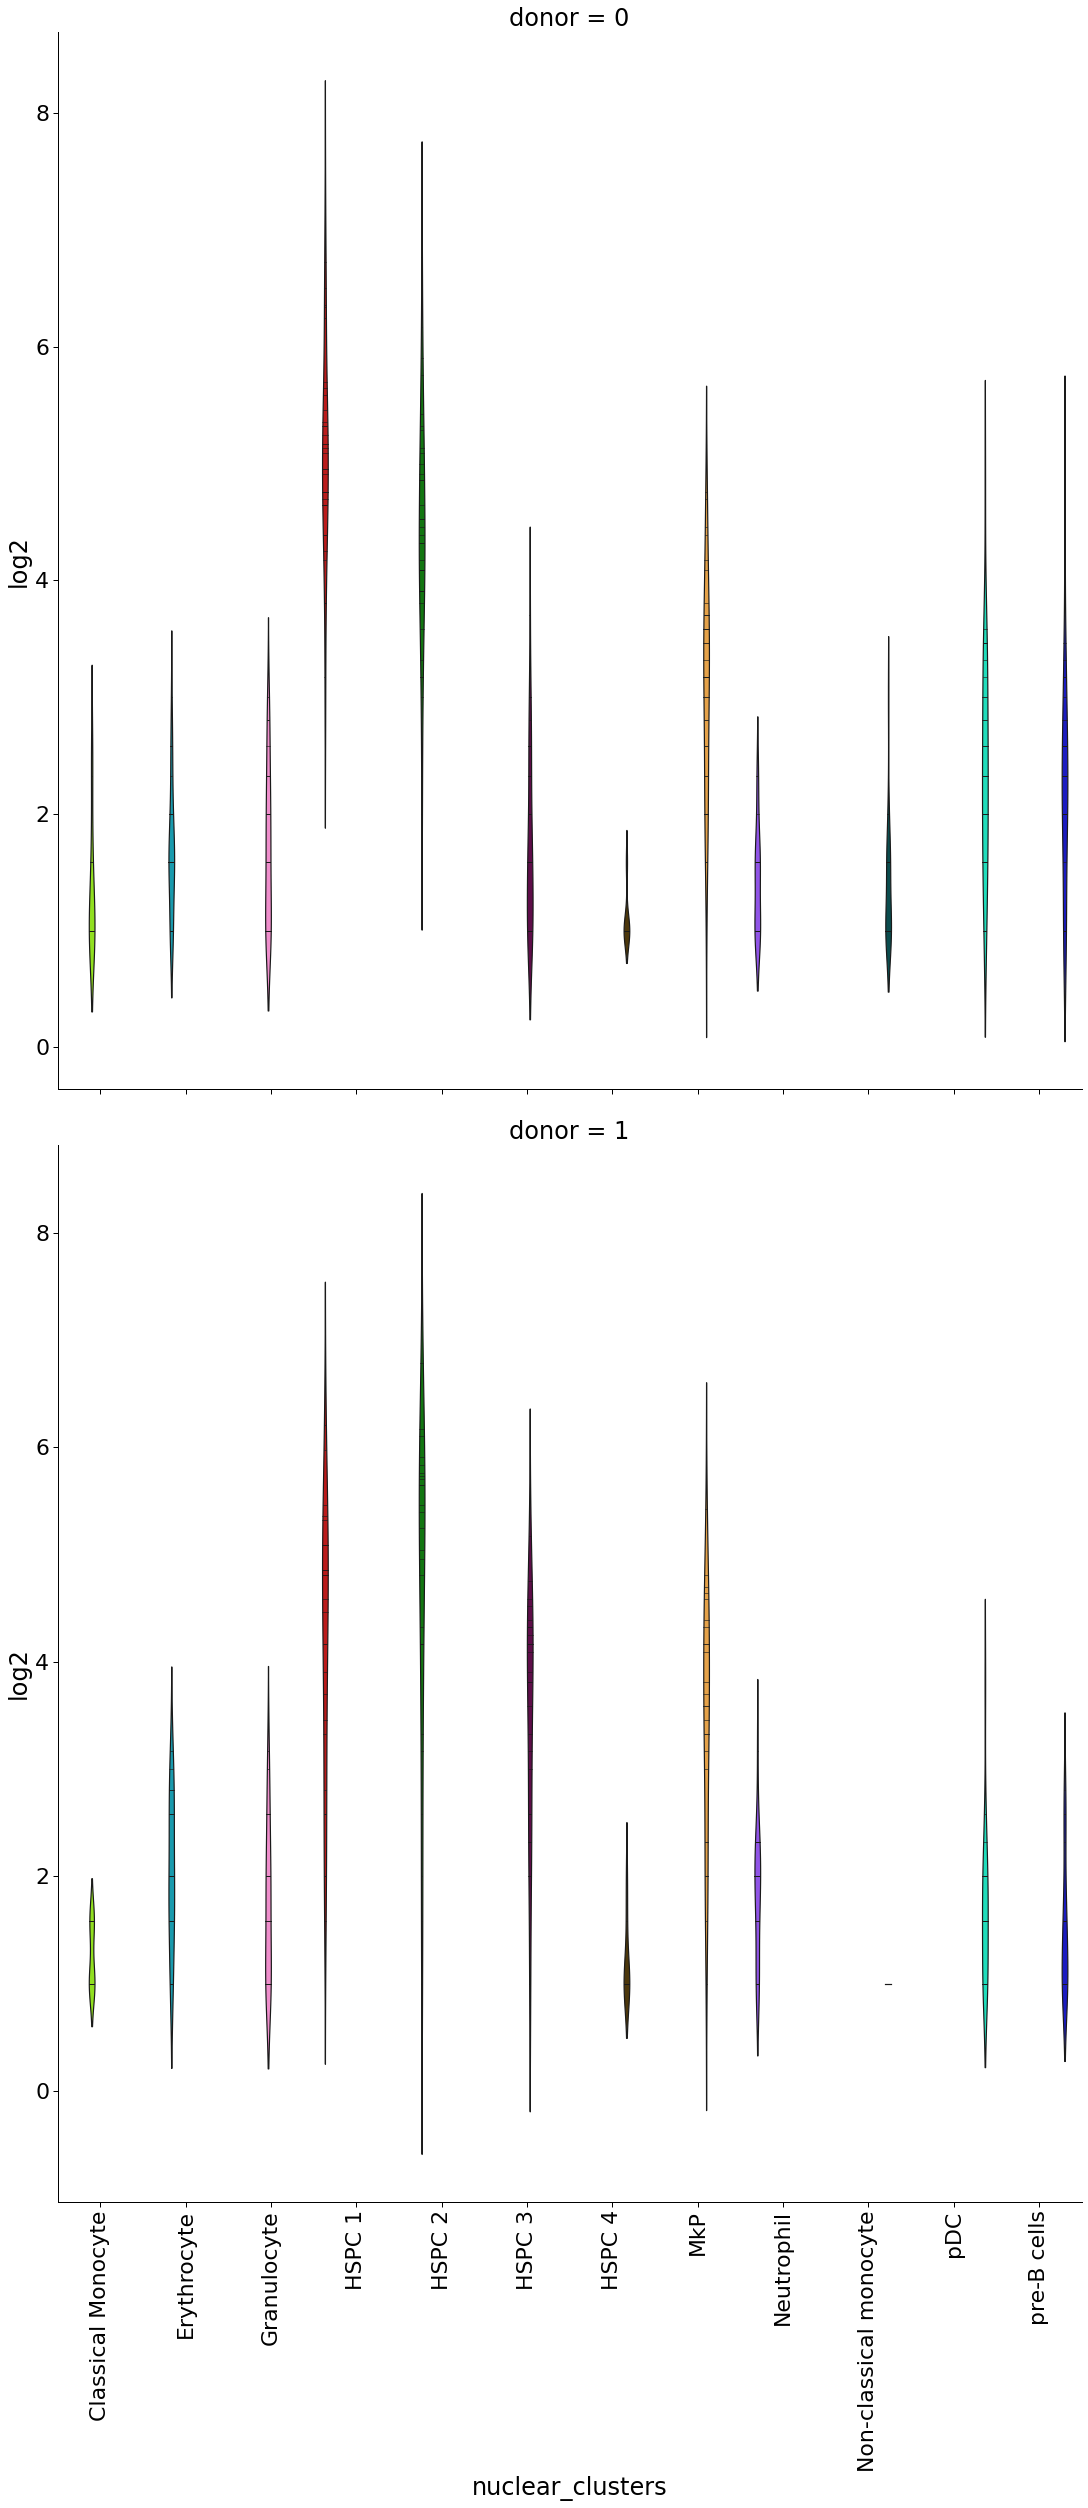

In [11]:

sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, inner='stick',
            hue="nuclear_clusters", palette=palette, hue_order=hue_order,
            row="donor", kind="violin", height=16)
plt.xticks(rotation=90)
plt.savefig(join(outdir, f"{cond}.clone_cluster_box.svg"))
plt.savefig(join(outdir, f"{cond}.clone_cluster_box.pdf"))


sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, inner='stick', sharey=False,
            row="donor", kind="violin", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order,)
plt.xticks(rotation=90)
plt.savefig(join(outdir, f"{cond}.clone_cluster_box_diffY.svg"))
plt.savefig(join(outdir, f"{cond}.clone_cluster_box_diffY.pdf"))




sns.catplot(x="nuclear_clusters", y="log2", data=clone_counts, inner='stick', sharey=False,
            row="donor", kind="violin", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order,)
plt.xticks(rotation=90)
plt.savefig(join(outdir, f"{cond}.log2_clone_cluster_box_diffY.svg"))
plt.savefig(join(outdir, f"{cond}.log2_clone_cluster_box_diffY.pdf"))


In [12]:
def donor_plots(df, name):
    donors = df["donor"].unique()
    f, ax = plt.subplots(figsize=(16,9), ncols=len(donors), squeeze=False)
    count = 0
    for d, val in df.groupby("donor"):
    
        curr_donor_clones = val.drop(["ncells", "donor"],axis=1)
        curr_donor_clones.plot.bar(stacked=True, ax=ax[0, count], color=color_d)
        ax[count].set_title(f"Donor {d}")
        count += 1
        curr_donor_clones.to_csv(name + f".donor{d}.csv")
        
    if len(df["donor"].unique()) >1:
        ax[0,0].get_legend().remove()
    plt.legend(bbox_to_anchor=(1.05,1))
    plt.tight_layout()
    plt.savefig(join(outdir, name+f".{cond}.barplot.png"))
    plt.savefig(join(outdir, name+f".{cond}.barplot.pdf"), dpi=300)
    return

def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]



## Plot counts for each donor

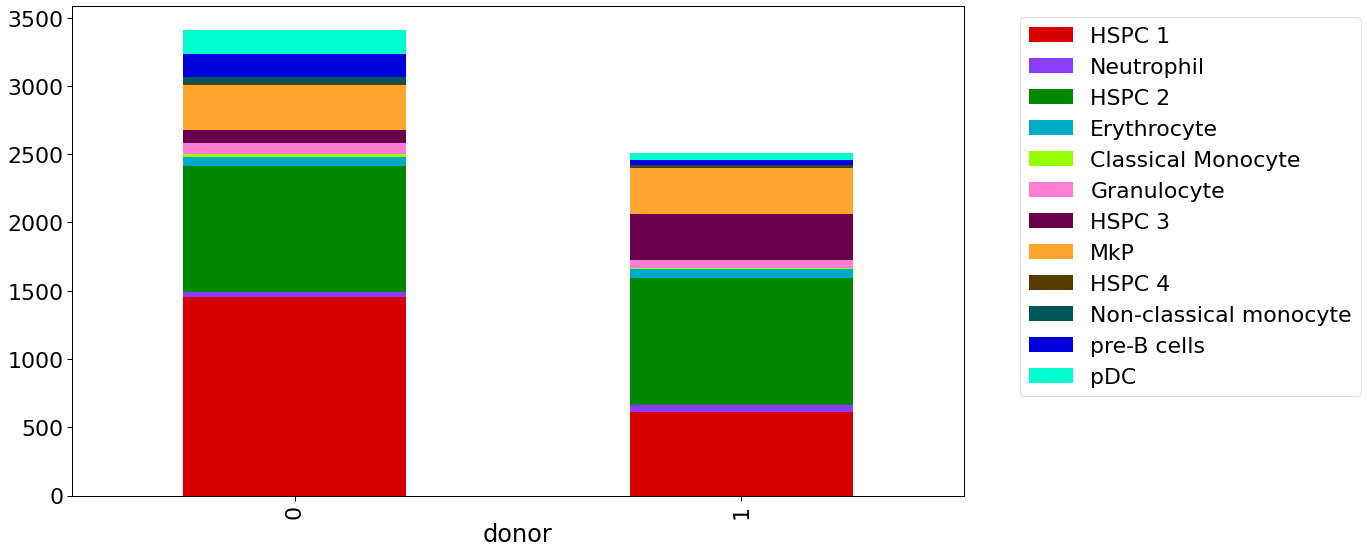

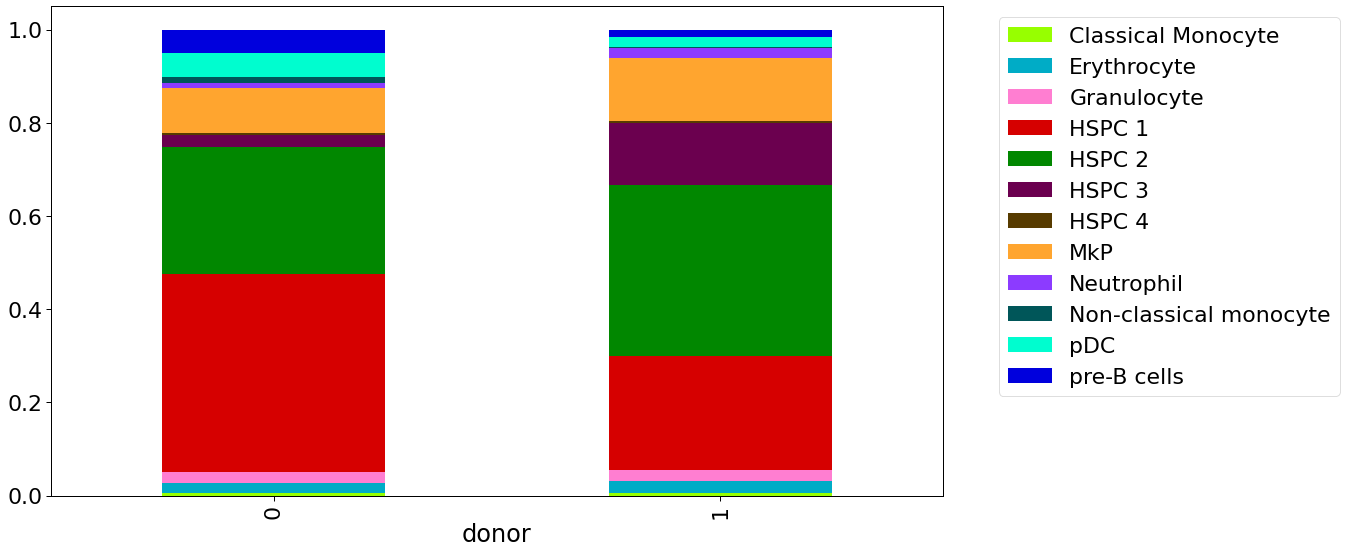

In [13]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "donor"]).size()

tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).fillna(0)
tmp

f, ax = plt.subplots(figsize=(16,9))
tmp.loc[:, [x for x in hue_order if x in tmp.columns]].plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, f"{cond}.all_clones_barplot_clones.png"))
plt.savefig(join(outdir, f"{cond}.all_clones_barplot_clones.pdf"))

### Normalize to each donor
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).fillna(0)
f, ax = plt.subplots(figsize=(16,9))
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, f"{cond}.norm_all_clones_barplot_clones.png"))
plt.savefig(join(outdir, f"{cond}.norm_all_clones_barplot_clones.pdf"))


In [14]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")


clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]


# Normalize per clone

In [15]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]

clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()


sum of normed values nuclear_clusters        donor
Classical Monocyte      0         0.169645
                        1         0.129595
Erythrocyte             0         0.712844
                        1         0.711162
Granulocyte             0         0.907822
                        1         0.650714
HSPC 1                  0        15.267761
                        1         6.291013
HSPC 2                  0         9.708586
                        1         8.907917
HSPC 3                  0         0.989634
                        1         3.611950
HSPC 4                  0         0.126767
                        1         0.107876
MkP                     0         3.690727
                        1         3.622660
Neutrophil              0         0.326173
                        1         0.493166
Non-classical monocyte  0         0.509314
                        1         0.071593
pDC                     0         1.858770
                        1         0.659454
pre

,donor,ncells,Classical Monocyte,Erythrocyte,Granulocyte,HSPC 1,HSPC 2,HSPC 3,HSPC 4,MkP,Neutrophil,Non-classical monocyte,pDC,pre-B cells
name,,,,,,,,,,,,,,
0_0,0,1.0,0.010309,0.018041,0.018041,0.420103,0.278351,0.030928,0.005155,0.067010,0.010309,0.002577,0.069588,0.069588
0_1,0,1.0,0.007843,0.015686,0.023529,0.411765,0.278431,0.027451,0.000000,0.098039,0.007843,0.007843,0.039216,0.082353
0_7,0,1.0,0.016260,0.000000,0.008130,0.398374,0.308943,0.056911,0.008130,0.130081,0.000000,0.016260,0.016260,0.040650
0_8,0,1.0,0.010417,0.020833,0.041667,0.364583,0.322917,0.010417,0.010417,0.072917,0.020833,0.010417,0.062500,0.052083
0_9,0,1.0,0.009804,0.029412,0.029412,0.500000,0.274510,0.019608,0.000000,0.078431,0.009804,0.000000,0.049020,0.000000


### Order both by the norm df by variance

In [16]:
# clone_norm_df = clone_norm_df.loc[clone_norm_df.drop(["donor", "ncells"], axis=1).var(axis=1).sort_values(ascending=False).index]
# clone_counts_filt_10_df = clone_counts_filt_10_df.loc[clone_norm_df.index]
# clone_counts_filt_10_df

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

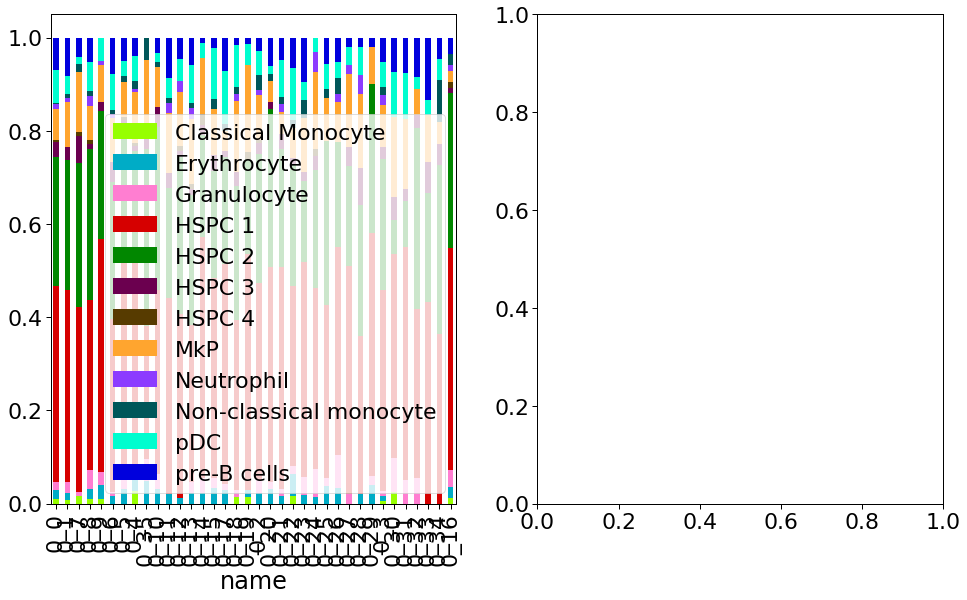

In [17]:
donor_plots(clone_norm_df,
      name="normalized_counts")

In [ ]:
%matplotlib inline
donor_plots(clone_counts_filt_10_df,
      name="clone_cluster_counts")

---

# Group counts across donors and conditions and just conditions

In [ ]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "condition", "donor"]).size()
group_counts
f, ax = plt.subplots()
group_counts.reset_index().pivot(columns="nuclear_clusters", index=["condition", "donor"], values=0).plot.bar(stacked=True,
                                                                                                              color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, f"{cond}.all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, f"{cond}.all_conditions_clones_barplot_clones.pdf"))



### Normalize to each condition and donor
f, ax = plt.subplots()
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters",
                                       index=["condition","donor"], values=0)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, f"{cond}.norm_all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, f"{cond}.norm_all_conditions_clones_barplot_clones.pdf"))


In [ ]:
## Group counts across donors and conditions and just conditions
group_counts = se_cells_meta.groupby(["nuclear_clusters", "condition"]).size()
group_counts
f, ax = plt.subplots()
group_counts.reset_index().pivot(columns="nuclear_clusters", index=["condition"], values=0).plot.bar(stacked=True, 
                                                                                                     color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, f"{cond}.conditions_barplot_clones.png"), bbox_inches='tight')
plt.savefig(join(outdir, f"{cond}.conditions_clones_barplot_clones.pdf"), bbox_inches='tight')


f, ax = plt.subplots()
### Normalize to each condition and donor
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters",
                                       index=["condition"], values=0)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True,color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, f"{cond}.norm_conditions_clones_barplot_clones.png"), bbox_inches='tight')
plt.savefig(join(outdir, f"{cond}.norm_conditions_clones_barplot_clones.pdf"), bbox_inches='tight')



---

---

---

In [ ]:
outdir